In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style


### **Impoting data**

In [6]:
df = pd.read_csv('AIR_BNB.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,19-10-2018,0.21,3.5,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,21-05-2019,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,23-06-2019,0.72,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,58.5,05-07-2019,3.53,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,19-11-2018,0.10,1.0,0.0


In [7]:
df = df.drop('id', axis=1)

In [11]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,19-10-2018,0.21,3.5,365.0
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,21-05-2019,0.38,2.0,355.0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,23-06-2019,0.72,1.0,365.0
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,58.5,05-07-2019,3.53,1.0,194.0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,19-11-2018,0.10,1.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            5 non-null      object 
 1   host_id                         5 non-null      int64  
 2   host_name                       5 non-null      object 
 3   neighbourhood_group             5 non-null      object 
 4   neighbourhood                   5 non-null      object 
 5   latitude                        5 non-null      float64
 6   longitude                       5 non-null      float64
 7   room_type                       5 non-null      object 
 8   price                           5 non-null      float64
 9   minimum_nights                  5 non-null      float64
 10  number_of_reviews               5 non-null      float64
 11  last_review                     5 non-null      object 
 12  reviews_per_month               5 non-nu

In [13]:
df.describe(include='all')

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,5,5.000000,5,5,5,5.000000,5.000000,5,5.000000,5.000000,5.000000,5,5.000000,5.000000,5.000000
unique,5,NaN,5,2,5,NaN,NaN,2,NaN,NaN,NaN,5,NaN,NaN,NaN
top,Clean & quiet apt home by the park,NaN,John,Manhattan,Kensington,NaN,NaN,Entire home/apt,NaN,NaN,NaN,19-10-2018,NaN,NaN,NaN
freq,1,NaN,1,3,1,NaN,NaN,3,NaN,NaN,NaN,1,NaN,NaN,NaN
mean,NaN,4465.000000,NaN,NaN,NaN,40.738756,-73.960358,NaN,138.600000,3.200000,24.300000,NaN,0.988000,1.700000,255.800000
std,NaN,1807.464937,NaN,NaN,NaN,0.070592,0.018037,NaN,58.303516,3.898718,25.772078,NaN,1.440233,1.095445,160.423502
min,NaN,2787.000000,NaN,NaN,NaN,40.647490,-73.983770,NaN,80.000000,1.000000,0.000000,NaN,0.100000,1.000000,0.000000
25%,NaN,2845.000000,NaN,NaN,NaN,40.685140,-73.972370,NaN,89.000000,1.000000,9.000000,NaN,0.210000,1.000000,194.000000
50%,NaN,4632.000000,NaN,NaN,NaN,40.753620,-73.959760,NaN,149.000000,1.000000,9.000000,NaN,0.380000,1.000000,355.000000
75%,NaN,4869.000000,NaN,NaN,NaN,40.798510,-73.943990,NaN,150.000000,3.000000,45.000000,NaN,0.720000,2.000000,365.000000


### **Unique Values for Catagorial Values**

In [15]:
for column in df.columns:
    if df[column].dtype == object:
        print(column.upper(), ':', (df[column].unique()))
        print(df[column].value_counts().sort_values)
        print('\n')

NAME : ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park']
<bound method Series.sort_values of name
Clean & quiet apt home by the park                  1
Skylit Midtown Castle                               1
THE VILLAGE OF HARLEM....NEW YORK !                 1
Cozy Entire Floor of Brownstone                     1
Entire Apt: Spacious Studio/Loft by central park    1
Name: count, dtype: int64>


HOST_NAME : ['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura']
<bound method Series.sort_values of host_name
John           1
Jennifer       1
Elisabeth      1
LisaRoxanne    1
Laura          1
Name: count, dtype: int64>


NEIGHBOURHOOD_GROUP : ['Brooklyn' 'Manhattan']
<bound method Series.sort_values of neighbourhood_group
Manhattan    3
Brooklyn     2
Name: count, dtype: int64>


NEIGHBOURHOOD : ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'

### **Converting Insant_bookable from 'f' and 't' to Boolean**

In [20]:
df.room_type.replace(['f','t'],[False,True],inplace=True)

/tmp/ipython-input-2400843114.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.room_type.replace(['f','t'],[False,True],inplace=True)


In [21]:
df.room_type.astype("object")

,room_type
0,Private room
1,Entire home/apt
2,Private room
3,Entire home/apt
4,Entire home/apt


In [29]:
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

In [30]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,149.0,1.0,9.0,19-10-2018,0.21,3.5,365.0,True
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225.0,1.0,45.0,21-05-2019,0.38,2.0,355.0,False
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150.0,3.0,0.0,23-06-2019,0.72,1.0,365.0,True
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89.0,1.0,58.5,05-07-2019,3.53,1.0,194.0,False
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80.0,10.0,9.0,19-11-2018,0.10,1.0,0.0,False


### **Imuting Missing Values**

In [32]:
df.isnull().sum()

,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
price,0
minimum_nights,0
number_of_reviews,0


In [45]:
display(df.mean(numeric_only=True))
df.isnull().sum()

,0
host_id,4465.000000
latitude,40.738756
longitude,-73.960358
price,138.600000
minimum_nights,3.200000
number_of_reviews,24.300000
reviews_per_month,0.988000
calculated_host_listings_count,1.700000
availability_365,255.800000
room_type_Private room,0.400000


,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
price,0
minimum_nights,0
number_of_reviews,0


In [46]:
df.head()


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,149.0,1.0,9.0,19-10-2018,0.21,3.5,365.0,True
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225.0,1.0,45.0,21-05-2019,0.38,2.0,355.0,False
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150.0,3.0,0.0,23-06-2019,0.72,1.0,365.0,True
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89.0,1.0,58.5,05-07-2019,3.53,1.0,194.0,False
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80.0,10.0,9.0,19-11-2018,0.10,1.0,0.0,False


In [47]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,4465.000000,40.738756,-73.960358,138.600000,3.200000,24.300000,0.988000,1.700000,255.800000
std,1807.464937,0.070592,0.018037,58.303516,3.898718,25.772078,1.440233,1.095445,160.423502
min,2787.000000,40.647490,-73.983770,80.000000,1.000000,0.000000,0.100000,1.000000,0.000000
25%,2845.000000,40.685140,-73.972370,89.000000,1.000000,9.000000,0.210000,1.000000,194.000000
50%,4632.000000,40.753620,-73.959760,149.000000,1.000000,9.000000,0.380000,1.000000,355.000000
75%,4869.000000,40.798510,-73.943990,150.000000,3.000000,45.000000,0.720000,2.000000,365.000000
max,7192.000000,40.809020,-73.941900,225.000000,10.000000,58.500000,3.530000,3.500000,365.000000


### **Checking For Duplicates**

In [48]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [49]:
print('Before',df.shape)
df.drop_duplicates(inplace=True)
print('After',df.shape)

Before (5, 15)
After (5, 15)


### **Correlation Plot**

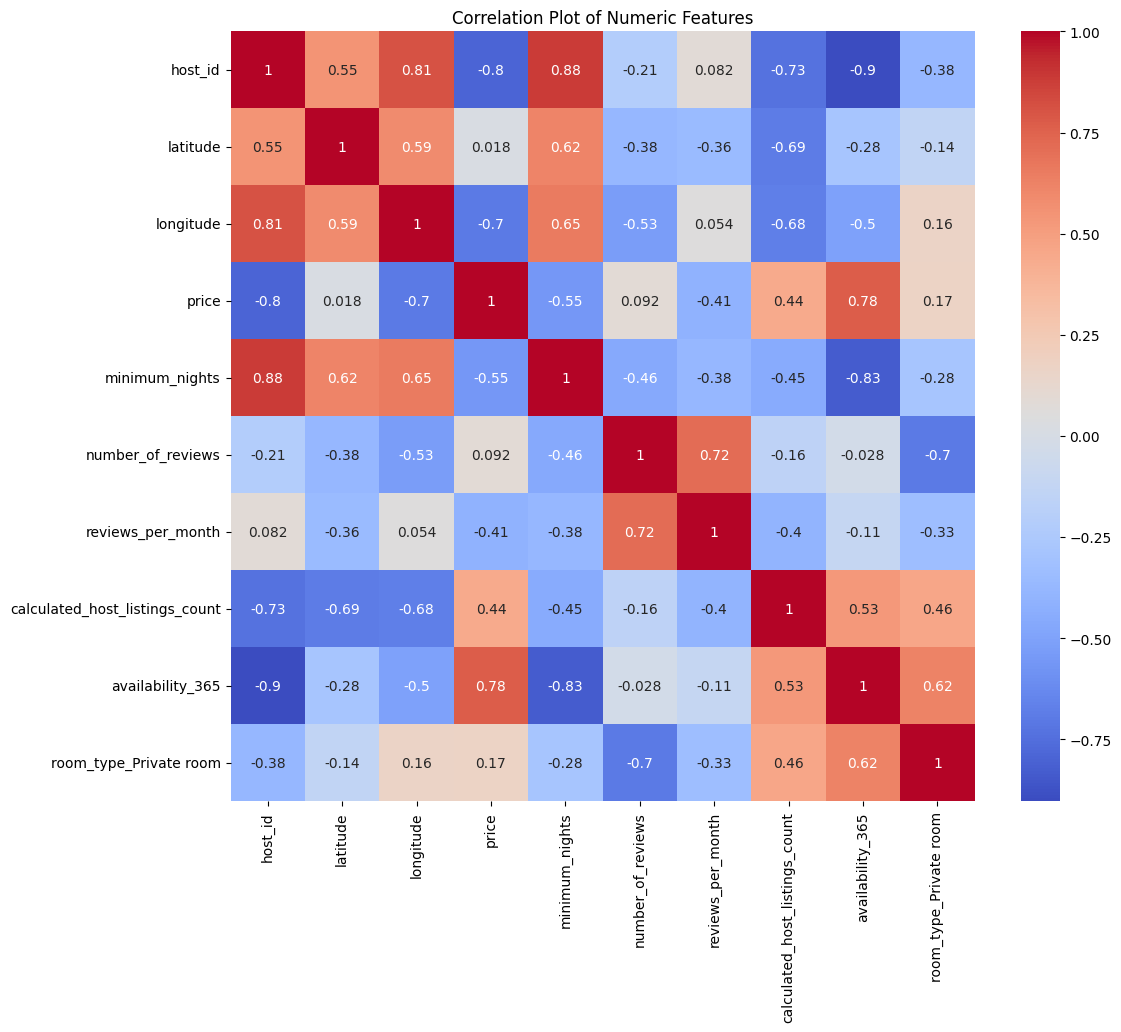

In [61]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Plot of Numeric Features')
plt.show()

### **Outlier Checks**

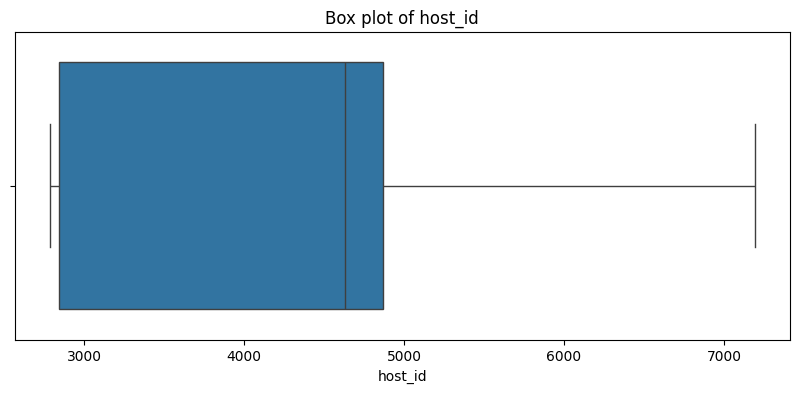

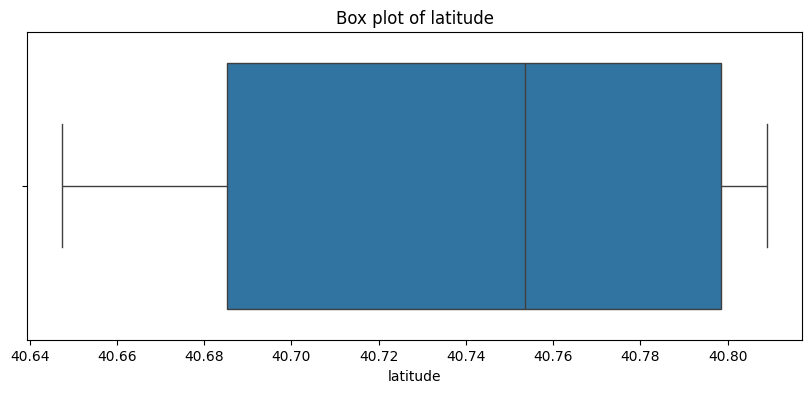

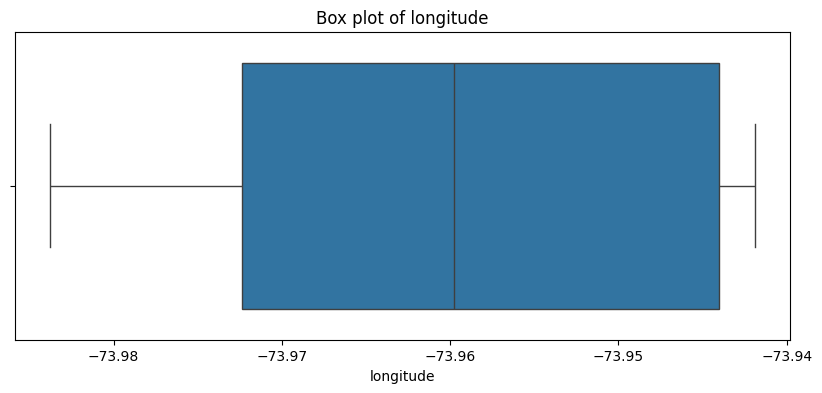

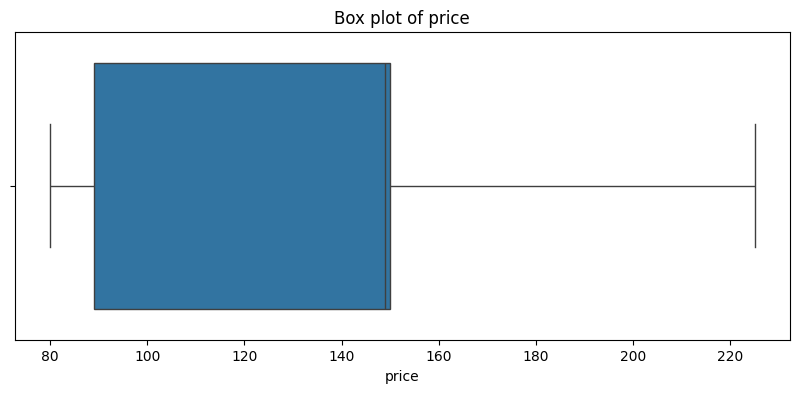

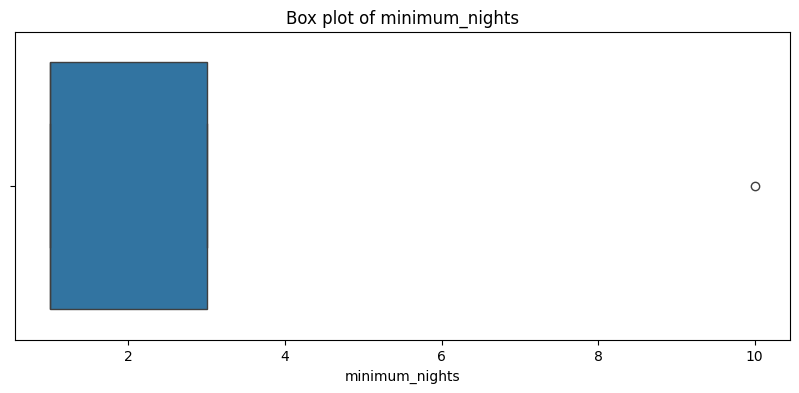

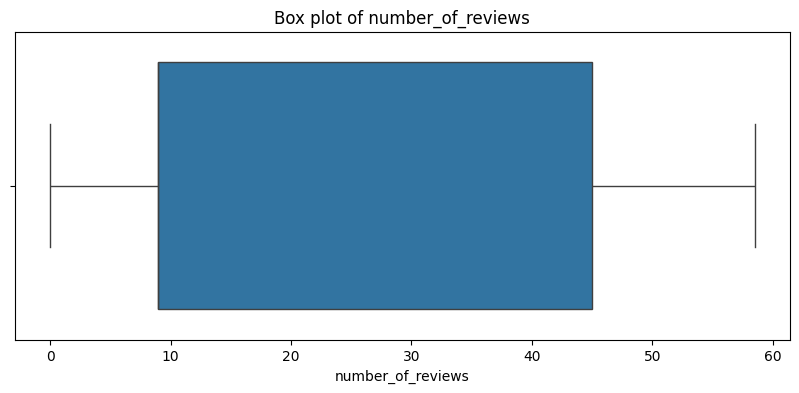

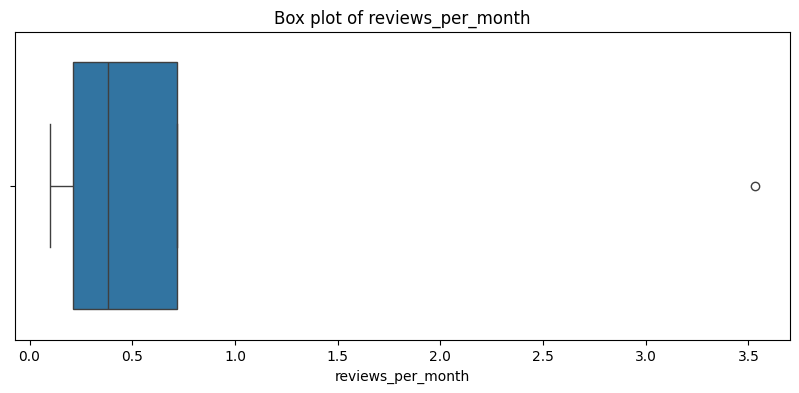

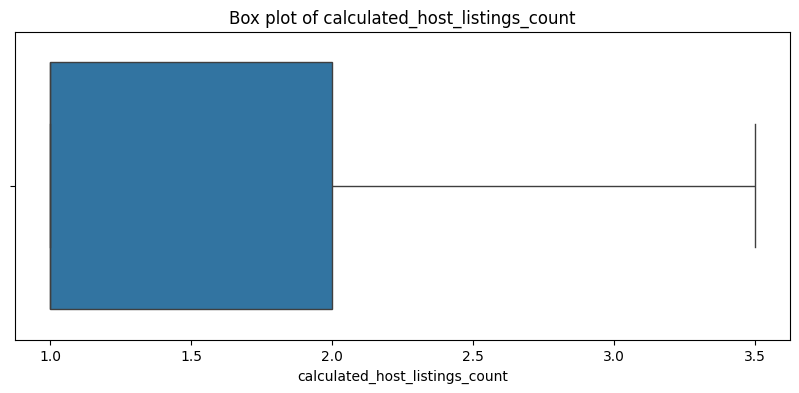

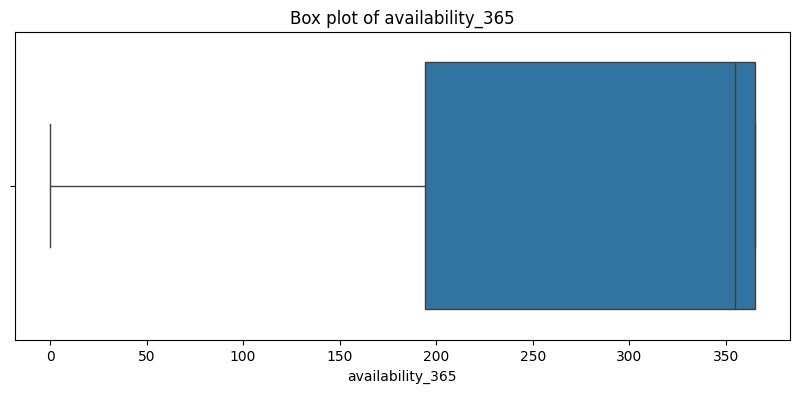

In [60]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [62]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("DataFrame shape after outlier removal:", df.shape)

DataFrame shape after outlier removal: (3, 15)


### **Data Distribution**

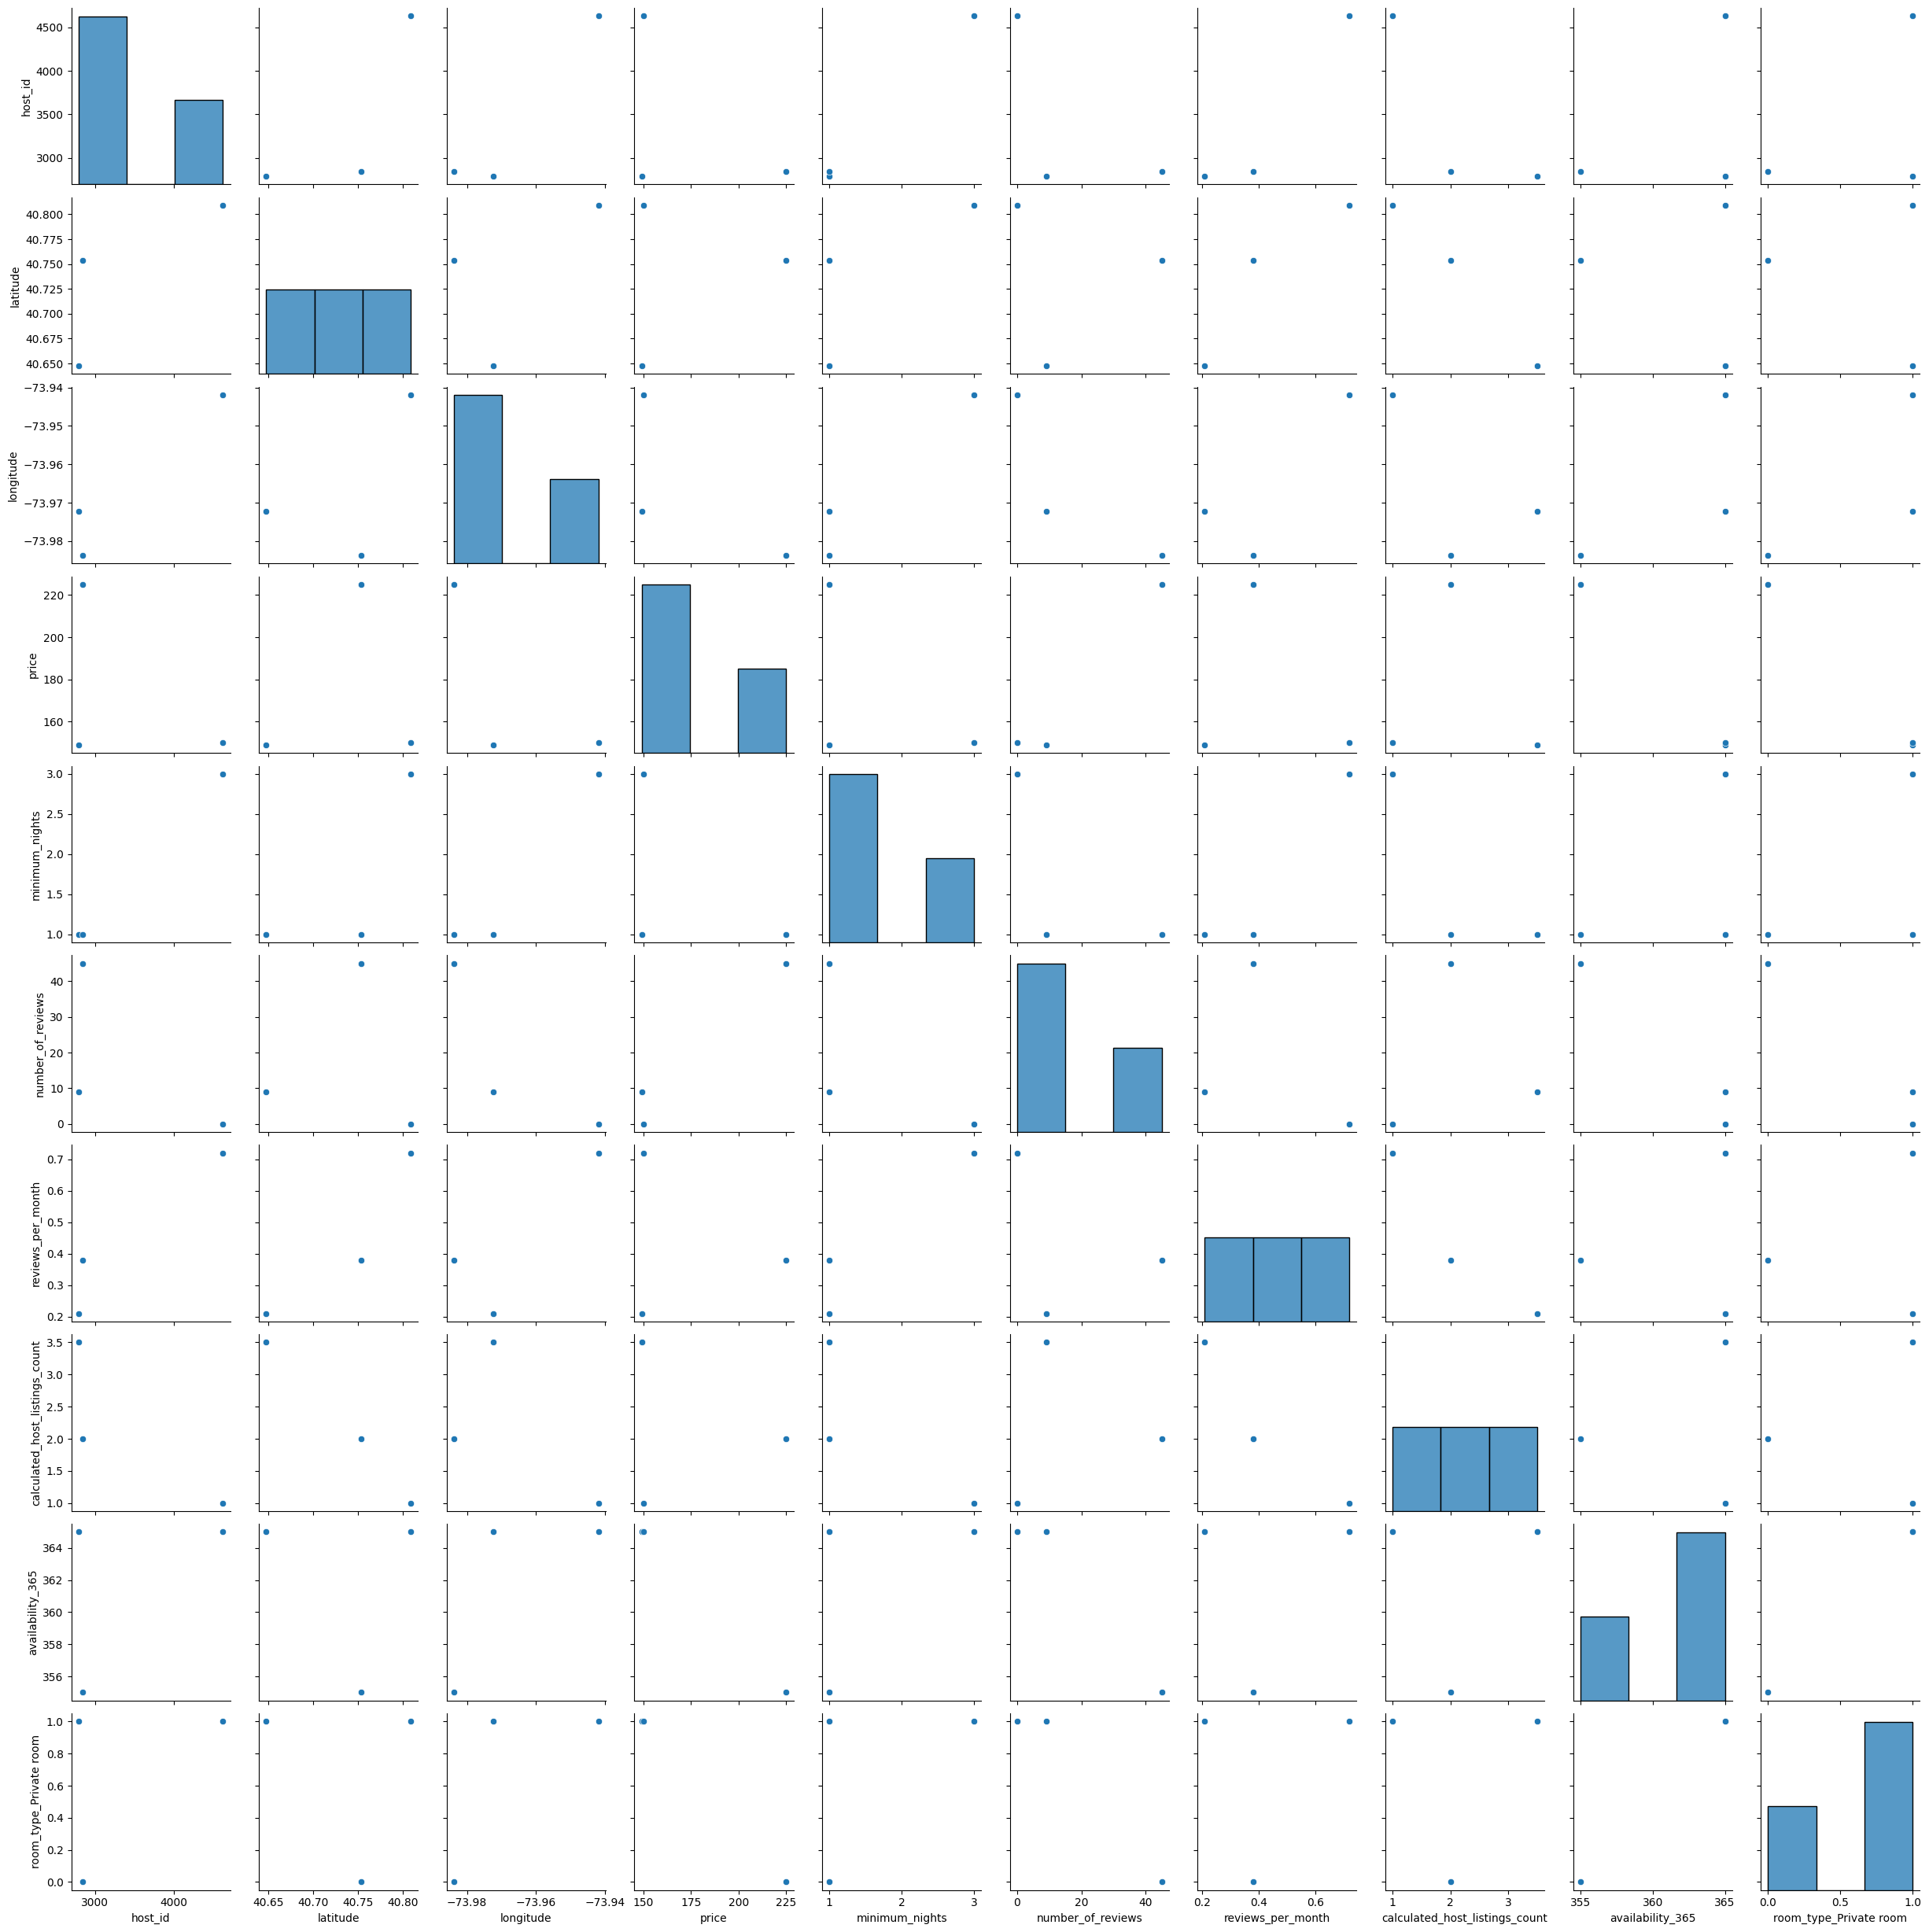

In [65]:
df_attr = (df[:])
sns.pairplot(df_attr)
plt.show()

### **Train-Split Test**

In [72]:
x = df.drop(['price', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'last_review'], axis=1)
y = df['price']

In [69]:
x.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1.0,9.0,19-10-2018,0.21,3.5,365.0,True
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,1.0,45.0,21-05-2019,0.38,2.0,355.0,False
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,3.0,0.0,23-06-2019,0.72,1.0,365.0,True


### **Linear Regression Model**

In [74]:
regression_model = LinearRegression()
regression_model.fit(x, y)

LinearRegression()

In [75]:
for idx, col_name in enumerate(x.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for host_id is 0.009911837652328288
The coefficient for latitude is 0.005409045217900204
The coefficient for longitude is -0.0006612132513723202
The coefficient for minimum_nights is -0.0033541173329015516
The coefficient for number_of_reviews is 1.9417670242246745
The coefficient for reviews_per_month is 0.008242880478958025
The coefficient for calculated_host_listings_count is -0.0760854156766488
The coefficient for availability_365 is -0.5351870822851696
The coefficient for room_type_Private room is -0.05351870822851717


In [81]:
predictions = regression_model.fit(x,y).predict(x)
np.sqrt(metrics.mean_squared_error(y, predictions))

np.float64(2.320622857404618e-14)

In [82]:
regression_model.score(x,y)

1.0

### **Linear Models using StatsModels(OLS)**

In [83]:
import statsmodels.api as sm

In [91]:
x = sm.add_constant(x)

In [95]:
x = sm.add_constant(x)
x['room_type_Private room'] = x['room_type_Private room'].astype(int)

model = sm.OLS(y, x).fit()
model.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 22 Sep 2025   Prob (F-statistic):                nan
Time:                        12:41:40   Log-Likelihood:                 85.290
No. Observations:                   3   AIC:                            -164.6
Df Residuals:                       0   BIC:                            -167.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0022        inf          0        nan         nan         nan
host_id                            0.0110        inf          0        nan         nan         nan
latitude                           0.0953        inf          0        nan         nan         nan
longitude                         -0.1645        inf         -0        nan         nan         nan
minimum_nights                    -0.0081        inf         -0        nan         nan         nan
number_of_reviews                  2.1522        inf          0        nan         nan         nan
reviews_per_month                  0.0077        inf          0        nan         nan         nan
calculated_host_listings_count    -0.0663        inf         -0        nan         nan         nan
availability_365                   0.2284        inf          0        nan         nan         nan
room_type_Private room            -0.0557        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.364
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.531
Skew:                           0.707   Prob(JB):                        0.767
Kurtosis:                       1.500   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""